Run the cell below to import the required packages for this notebook:

In [1]:
# the plotting package is matplotlib:
import matplotlib.pyplot as plt 
# the next line allows you to view the plots more easily:
%matplotlib inline
# the numpy package has import math stuff in it:
import numpy as np 
# the pandas package allows us to do spreadsheet stuff:
import pandas as pd

Recall Euler's method to approximate the solution to $\frac{dy}{dx} = f(x,y)$. We'll write a program called euler that takes in a function $f(x,y)$, an initial x value $x_0$, an initial y value $y_0$, a step size $h$, and an end x value $x_1$ and returns the end y-value approximation. We'll simultaneously update the x and y values:

In [2]:
def euler(f,x0,y0,h,x1):
    steps = int((x1-x0)/h)
    for i in range(steps):
        x0, y0 = x0 + h, y0+h*f(x0)
        print(x0, y0)
    return y0

print(euler(np.sin, 0, 1, 0.5, 2))

0.5 1.0
1.0 1.2397127693021015
1.5 1.6604482617060499
2.0 2.159195755008077
2.159195755008077


Notice that up until now, we've been only printing values, not storing them for later use. If we want to plot the Euler's method solution, for example, we'll definitely want to store all of the Euler's method (x,y) coordinates in a list. Therefore, let's learn about lists next.

### Lists
Lists start at index 0 (not 1). 

We can reference the length of the list using "len".

Here's a list of dogs:

In [3]:
dogs = ['border collie', 'australian cattle dog', 'labrador retriever']
print(dogs)
print(dogs[0])
print(dogs[1])
print(dogs[2])
print(len(dogs))

['border collie', 'australian cattle dog', 'labrador retriever']
border collie
australian cattle dog
labrador retriever
3


We can create empty lists using square brackets.

We can add things to lists by using .append:

In [4]:
dogs = []
dogs.append('pit bull')
dogs.append('boxer')
dogs.append('labrador')
print(dogs)

['pit bull', 'boxer', 'labrador']


We can loop through lists using for loops:

In [5]:
dogs = ['border collie', 'australian cattle dog', 'labrador retriever']
for doggie in dogs:
    print(doggie)

border collie
australian cattle dog
labrador retriever


Be careful, though, because looping through lists is one of the trickiest things to get started with. What if I had printed "dogs" instead of "doggie" inside the for loop? It would just print the entire dogs list three times:

In [6]:
dogs = ['border collie', 'australian cattle dog', 'labrador retriever']
for doggie in dogs:
    print(dogs)

['border collie', 'australian cattle dog', 'labrador retriever']
['border collie', 'australian cattle dog', 'labrador retriever']
['border collie', 'australian cattle dog', 'labrador retriever']


Notice that "for doggie in dogs" simply creates a loop that executes three times, and you can specify whatever you want inside that loop by indenting the commands:

In [7]:
dogs = ['border collie', 'australian cattle dog', 'labrador retriever']

print("I'm about to enter the doggie loop.")

count = 1
for doggie in dogs:
    print("Hi! This is time", count, "through the doggie loop.")
    count = count + 1
    
print("Now I'm out of the doggie loop.")

I'm about to enter the doggie loop.
Hi! This is time 1 through the doggie loop.
Hi! This is time 2 through the doggie loop.
Hi! This is time 3 through the doggie loop.
Now I'm out of the doggie loop.


Here's an example where I sum all of the expenses in my list:

In [8]:
def sum_expenses(expenses):
    counter = 0
    for expense in expenses:
        counter = counter + expense
    return counter

expenses = [20, 100, -50, 0, 80]

sum_expenses(expenses)

150

We can even add conditional statements in to print a message about the user's balance:

In [9]:
def sum_expenses(expenses):
    counter = 0
    for expense in expenses:
        counter = counter + expense
    if counter > 0:
        print("Your balance is positive!")
    elif counter == 0:
        print("You have no money left!")
    else:
        print("You owe money!")
    return counter

expenses = [20, 100, -50, 0, 80]

sum_expenses(expenses)

Your balance is positive!


150

We can iterate through lists in two ways. 

Firstly, we can say something like "for item in item_list" like we did earlier:

In [10]:
doggies = ['border collie', 'australian cattle dog', 'labrador retriever', 'pitbull']
for dog in doggies:
    print(dog)

border collie
australian cattle dog
labrador retriever
pitbull


Alternatively, we can use the range function to iterate through the list by using its index value:

In [11]:
dogs = ['border collie', 'australian cattle dog', 'labrador retriever', 'pit bull']
for i in range(len(dogs)):
    print(dogs[i])

border collie
australian cattle dog
labrador retriever
pit bull


Even though the second method looks uglier, it is sometimes helpful since it gives us more control over what items in the list we choose to iterate through (only the even indexed items, for example):

In [12]:
dogs = ['border collie', 'australian cattle dog', 'labrador retriever', 'pit bull']
for i in range(0,len(dogs),2):
    print(dogs[i])

border collie
labrador retriever


We often want to add things to a list within a for loop. To add all of the integers between 0 and 10, we can type:

In [13]:
integers = []
for i in range(11):
    integers.append(i)
print(integers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


What if we wanted to add all of the factors of 20 to a list?

In [14]:
factors = []
for i in range(1,21):
    if 20 % i == 0:
        factors.append(i)
print(factors)

[1, 2, 4, 5, 10, 20]


Going back to Euler's method, we can create two lists, one for the x and one for the y coordinates.

In [15]:
def euler(f,x0,y0,h,x1):
    x = np.arange(x0,x1+h,h) #generates list of x coordinates between x0 and x1 using step size h
    y = [y0]
    for i in range(1,len(x)):
        y0 = y0+h*f(x[i-1])
        y.append(y0)
        print(x[i], y[i])

euler(np.sin, 0, 1, 0.5, 2)

0.5 1.0
1.0 1.2397127693021015
1.5 1.6604482617060499
2.0 2.159195755008077


We can then plot the coordinates:

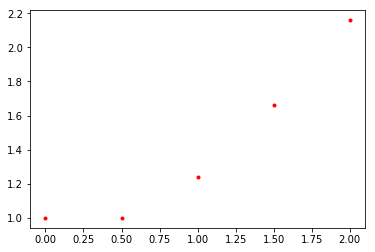

In [16]:
def euler(f,x0,y0,h,x1):
    x = np.arange(x0,x1+h,h) 
    y = [y0]
    for i in range(1,len(x)):
        y0 = y0+h*f(x[i-1])
        y.append(y0)
    plt.plot(x,y,'r.')

euler(np.sin, 0, 1, 0.5, 2)

How does the Euler's method approximation compare to the true solution $y=2-\cos(x)$?

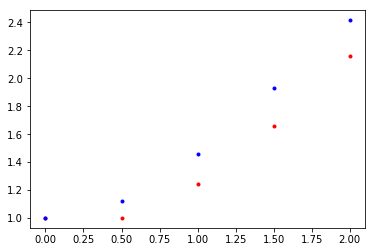

In [17]:
def euler(f,x0,y0,h,x1):
    x = np.arange(x0,x1+h,h) 
    y = [y0]
    for i in range(1,len(x)):
        y0 = y0+h*f(x[i-1])
        y.append(y0)
    plt.plot(x,y,'r.')
    plt.plot(x,2-np.cos(x),'b.')

euler(np.sin, 0, 1, 0.5, 2)

As one last example, suppose I want to create the Fibonacci sequence by referencing the last two items in my list and adding them. The indices "-1" and "-2" reference the last two items in the list:

In [18]:
def fibonacci(n):
    sequence = [1,1]
    for i in range(2,n):
        sequence.append(sequence[-1]+sequence[-2])
    return sequence

fibonacci(7)

[1, 1, 2, 3, 5, 8, 13]

### Exercise 1 - Euler's plot
Returning to your earlier Euler's method exercise for $f(x)=x^2$ given $f(1)=2$ and a step size of $0.25$, now plot the Euler's method approximation coordinates versus the true solution, $f(x)=\frac{x^3}{3}+\frac{5}{3}$, by storing the x and y coordinates in two lists.

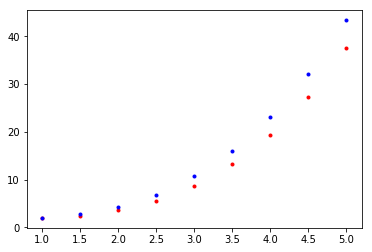

In [19]:
#insert exercise 1
def square(x):
    return x**2

def cube(x):
    return (x**3+5)/3

def euler(f,x0,y0,h,x1):
    x = np.arange(x0,x1+h,h)
    y = [y0]
    for i in range(1,len(x)):
        y0 = y0+h*f(x[i-1])
        y.append(y0)
    plt.plot(x,y, 'r.')
    plt.plot(x, cube(x),'b.')

euler(square, 1, 2, 0.5, 5)

### Exercise 2 - Left hand sum
Write a program called LHS that takes in a function, a left boundary a, a right boundary b, and the number of rectangles, n, and returns the left hand sum approximation for the area under $f(x)$ between $x=a$ and $x=b$: 

$\int_a^b f(x)dx \approx \sum_{i=1}^nf(x_{i-1})\Delta x$. 

For example, LHS(square,1,5,8) should return 35.5.

In [20]:
#insert exercise 2
def square(x):
    return x**2

def LHS(f,a,b,n):
    h = (b-a)/n
    left = 0
    for i in range(n):
        left = left + h*f(a+i*h)
    return left

LHS(square,1,5,8)

35.5

### Exercise 3 - Factorial

Iterate through the list ```items=[5,4,3,2,1]``` in two different ways: firstly, by referencing "for item in items" and secondly, by referencing "for i in range(len(items))". Then using whichever way you prefer, multiply the terms in the list to calculate 5! = 120.

In [21]:
#insert exercise 3
items = [5,4,3,2,1]

product = 1

for item in items:
    product = product * item
print(product)


product = 1

for i in range(len(items)):
    product = product * items[i]
print(product)

120
120


### Exercise 4 - Multiples of m
Create a function called multiples_of_m that takes in an integer n and an integer m and returns a list of all of the multiples of m between 0 and n.

In [22]:
#insert exercise 4
def multiples_of_m(m, n):
    multiples = []
    for i in range(n+1):
        if i % m == 0:
            multiples.append(i)
            
    return multiples

multiples_of_m(3, 21)

[0, 3, 6, 9, 12, 15, 18, 21]

### Exercise 5 - Great Lakes Solution

Here is one way to do the problem:

0 3500 1800 2400
0 3140.0 1537.0 2760.0
0 2819.6 1329.08 2982.12
0 2534.444 1160.7672 3102.7344
0 2280.65516 1021.679848 3148.282464
0 2054.7830924 904.74717032 3138.2933135999997
0 1853.756952236 805.0643291688 3087.4070972831996
0 1674.8436874900399 719.154435413992 3006.7414041099837
0 1515.6108818661355 644.4916442888593 2904.8280323658228
0 1373.8936848608605 579.1918493501448 2788.265660425913


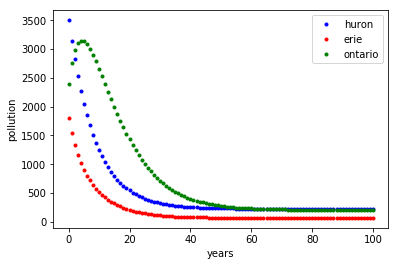

In [23]:
huron = [3500]
erie = [1800]
ontario = [2400]
years = [0]
for i in range(100):
    huron.append(25-0.11*huron[i]+huron[i])
    erie.append(0.11*huron[i]-0.36*erie[i]+erie[i])
    ontario.append(0.36*erie[i]-0.12*ontario[i]+ontario[i])
    years.append(years[i]+1)
    
for i in range(10):
    print(years[0],huron[i], erie[i], ontario[i])
    
plt.plot(years, huron, 'b.', label = 'huron')
plt.plot(years, erie, 'r.', label = 'erie')
plt.plot(years, ontario, 'g.', label = 'ontario')
plt.xlabel('years')
plt.ylabel('pollution')
plt.legend(loc='upper right')

Here is another way to do the problem:

0 3500 1800 2400
0 3140.0 1537.0 2760.0
0 2819.6 1329.08 2982.12
0 2534.444 1160.7672 3102.7344
0 2280.65516 1021.679848 3148.282464
0 2054.7830924 904.74717032 3138.2933135999997
0 1853.756952236 805.0643291688 3087.4070972831996
0 1674.8436874900399 719.154435413992 3006.7414041099837
0 1515.6108818661355 644.4916442888593 2904.8280323658228
0 1373.8936848608605 579.1918493501448 2788.265660425913


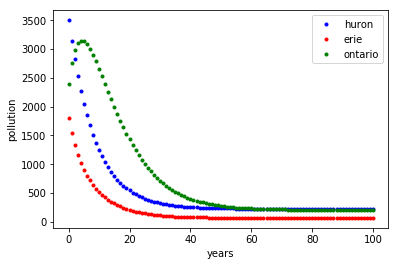

In [24]:
huron = [3500]
erie = [1800]
ontario = [2400]
years = [0]
for i in range(100):
    huron.append(25-0.11*huron[-1]+huron[-1])
    erie.append(0.11*huron[-2]-0.36*erie[-1]+erie[-1])
    ontario.append(0.36*erie[-2]-0.12*ontario[-1]+ontario[-1])
    years.append(years[-1]+1)
    
for i in range(10):
    print(years[0],huron[i], erie[i], ontario[i])
    
plt.plot(years, huron, 'b.', label = 'huron')
plt.plot(years, erie, 'r.', label = 'erie')
plt.plot(years, ontario, 'g.', label = 'ontario')
plt.xlabel('years')
plt.ylabel('pollution')
plt.legend(loc='upper right')

### Exercise 6 - SIRS Solution:

0 0.9 0.1 0.0
1 0.846 0.12000000000000001 -2.7755575615628914e-17
2 0.788488 0.14011200000000001 0.034000000000000016
3 0.7293420216063999 0.15875989839360002 0.07140000000000002
4 0.671057670459751 0.17425569208642494 0.11189808000000004
5 0.6163649629276126 0.18517012805456123 0.1546866374538241
6 0.5677320263612047 0.19069171198420093 0.1984649090178262
7 0.5269325772936175 0.1908136051426192 0.2415762616545944
8 0.4948304162057017 0.18626452223842085 0.2822538175637633
9 0.47141931172313306 0.17823619531551413 0.3189050615558775


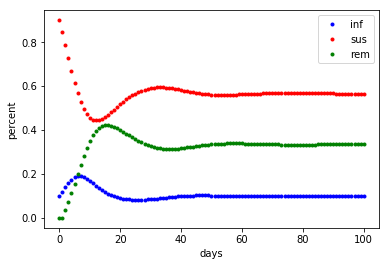

In [25]:
sus = [0.9]
inf = [0.1]
rem = [0.0]
days = [0]

#create your ds/dt and di/dt functions
def ds_dt(s,i):
    return -0.6*s*i+0.1*(1-s-i)

def di_dt(s,i):
    return 0.6*s*i-.34*i

#Euler's method
for i in range(100):
    sus.append(sus[i]+1*ds_dt(sus[i], inf[i]))
    inf.append(inf[i]+1*di_dt(sus[i], inf[i]))
    rem.append(1-sus[i]-inf[i])
    days.append(days[i]+1)

for i in range(10):
    print(days[i],sus[i], inf[i], rem[i])
    
plt.plot(days, inf, 'b.', label = 'inf')
plt.plot(days, sus, 'r.', label = 'sus')
plt.plot(days, rem, 'g.', label = 'rem')
plt.xlabel('days')
plt.ylabel('percent')
plt.legend(loc='upper right')

To do a subplot of the time plot and the phase plane, you can type the following. More subplot examples are located here:

https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html

Text(0, 0.5, 'infected')

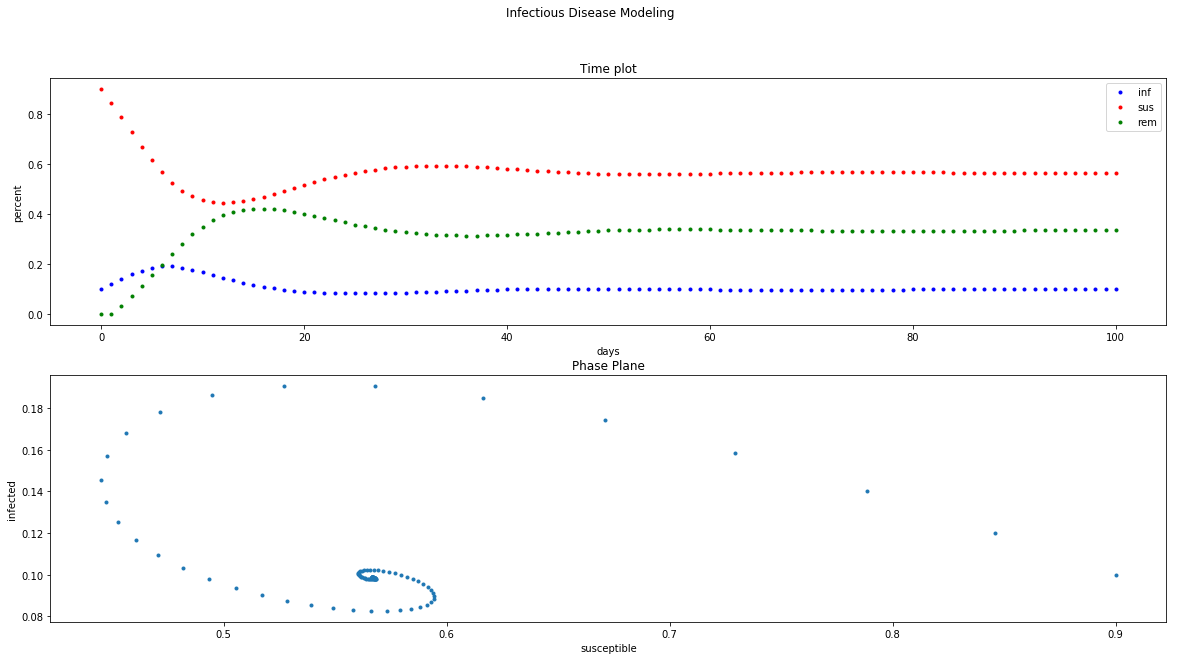

In [26]:
plt.rcParams['figure.figsize'] = [20, 10] #makes figure bigger
fig, (ax1, ax2) = plt.subplots(2) #creates two vertical subplots

fig.suptitle('Infectious Disease Modeling') #puts title above both of them

ax1.plot(days, inf, 'b.', label = 'inf')
ax1.plot(days, sus, 'r.', label = 'sus')
ax1.plot(days, rem, 'g.', label = 'rem')

ax1.set_xlabel('days')
ax1.set_ylabel('percent')
ax1.set_title('Time plot')
ax1.legend(loc='upper right')

ax2.plot(sus, inf, '.')
ax2.set_title('Phase Plane')
ax2.set_xlabel('susceptible')
ax2.set_ylabel('infected')